## FreeSurfer
**Author:** Thomas Shaw 1 Sept 2025  
https://github.com/thomshaw92 
https://orcid.org/0000-0003-2490-0532

**Citations:**

__Dataset__: T1 weighted MP2RAGE at 7T (healthy control)

- Shaw TB, York A, Barth M, Bollmann S. Towards Optimising MRI Characterisation of Tissue (TOMCAT) Dataset including all Longitudinal Automatic Segmentation of Hippocampal Subfields (LASHiS) data. Data Brief. 2020 Jul 20;32:106043. doi: https://doi.org/10.1016/j.dib.2020.106043 PMID: 32793772; PMCID: PMC7415822.

__recon-all-clinical__: 
- Karthik Gopinath, Douglas N. Greve, Colin Magdamo, Steve Arnold, Sudeshna Das, Oula Puonti, Juan Eugenio Iglesias,
‚ÄúRecon-all-clinical‚Äù: Cortical surface reconstruction and analysis of heterogeneous clinical brain MRI, Medical Image Analysis, Volume 103, 2025, 103608, ISSN 1361-8415, https://doi.org/10.1016/j.media.2025.103608.

## General Instructions:

<div style="border:2px solid #1976D2; border-radius:10px; padding:15px; background-color:#F0F8FF;">

<h2 style="color:#0D47A1;">üìò How to Use This Notebook</h2>

<p>
This notebook is an <b style="color:#1565C0;">interactive document</b>.  
It mixes short explanations (like this box) with computer code that runs automatically.
</p>

<h3 style="color:#1565C0;">‚ö° The basics</h3>
<ul style="font-size:16px; line-height:1.6;">
  <li>üëÜ <b>Click on a cell</b> (the boxes with text or code)</li>
  <li>‚ñ∂Ô∏è <b>Run it</b> by pressing <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux)</li>
  <li>‚è≠Ô∏è Or use the <b>play button</b> in the toolbar above</li>
  <li>‚¨áÔ∏è Move to the next cell and repeat</li>
</ul>

<h3 style="color:#1565C0;">üß© What happens when you run a cell?</h3>
<p>
The computer will either:
</p>
<ul style="font-size:16px; line-height:1.6;">
  <li>‚úèÔ∏è Show you some text or figures</li>
  <li>üñ•Ô∏è Run an analysis step in the background</li>
  <li>üìÇ Save results into a folder</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#0D47A1; font-weight:bold; font-size:16px;">
üí° Tip: Always <b>read the explanation</b above each code cell first ‚Äì it tells you in plain words what the computer will do.
</p>

</div>

There are a few **dataformats** that are used in this tutorial: <br>
Files that end in **'.mgz' and 'nii.gz'** are **volumetric images** (either showing the brain or a specific region of the brain).  <br>
Files that end in **'.stat'** are **statistics files**.  <br>
Files that end in **.txt** are just **text-files**.  <br>
Files that end in **'.csv'** are **datasheets**.  <br>
Files that end in **'.pial, .surf etc'** are **surface files**.  <br>

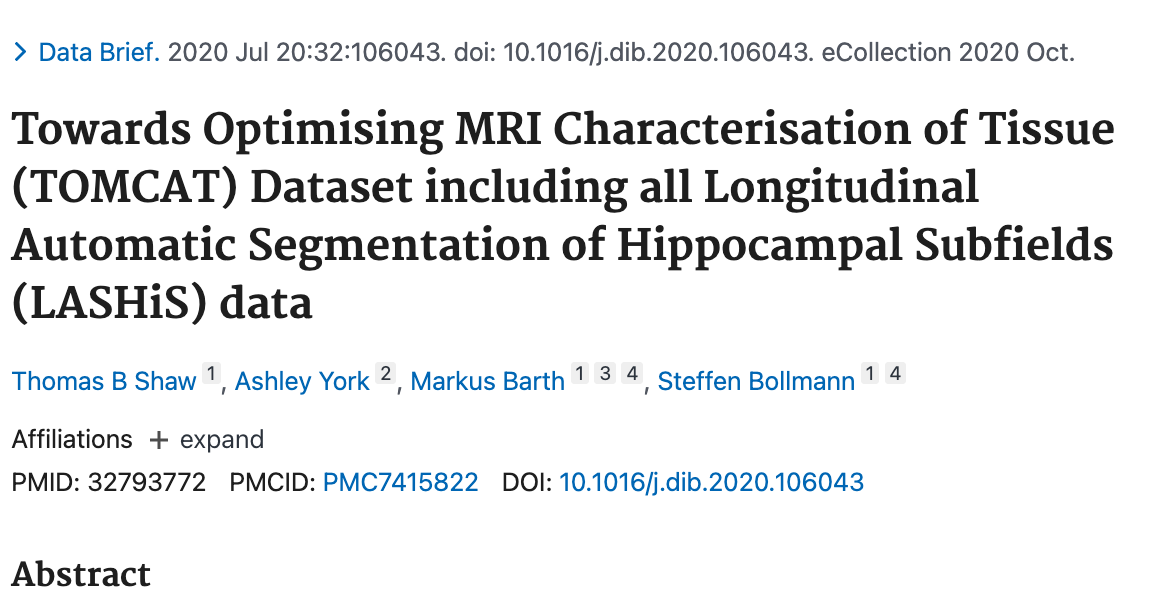

In [1]:
from IPython.display import Image, display
display(Image(filename="/data/structural/TOMCAT-reference.png", width=600))

## Load the module for this workbook

<div style="border:2px solid #9C27B0; border-radius:10px; padding:15px; background-color:#FAF5FF;">

<h2 style="color:#6A1B9A;">üì¶ What is a "Module"?</h2>

<p>
A <b style="color:#6A1B9A;">module</b> is just a way of telling the computer:  
<i>‚ÄúPlease make this special software ready to use.‚Äù</i>
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üóÑÔ∏è Many different programs live on this PACTALS server</li>
  <li>üéõÔ∏è We only load the ones we need, when we need them</li>
  <li>üîë Loading a module is like unlocking the tool so we can use it</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<h3 style="color:#6A1B9A;">üöÄ In this notebook</h3>
<p>
We will load <b>FreeSurfer 8</b> ‚Äì the software that analyses our scans.  
Once loaded, the commands will be available for us to run.
</p>

<pre style="background-color:#EEE; padding:10px; border-radius:5px;">
module load freesurfer/8.0.0
</pre>

<p style="color:#6A1B9A; font-weight:bold; font-size:16px;">
‚û°Ô∏è Just like before: click the cell, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux) to load it.
</p>

</div>

In [2]:
# we can use module to load freesurfer in a specific version
import module
await module.load('freesurfer/8.0.0')
await module.list()

['freesurfer/8.0.0']

## Let's try running the command with the --help flag!

In [3]:
!recon-all-clinical.sh --help

 
Recon-all-like stream for clinical scans of arbigrary orientation/resolution/contrast
 
Use this script to process clinical scans of arbitrary orientation, resolution, and 
contrast. It essentially runs a combination of:
* SynthSeg: to obtain a volumetric segmentation and linear registration to Talairach space
* SynthSR: to have a higher resolution 1mm MPRAGE for visualization
* SynthDist: to fit surfaces by predicting the distance maps and reconstructing topologically accurate cortical surfaces
 
Using this module is very simple: you just provide an input scan, the subject name, the
number of threads you want to use, and (optionally) the subjects directory:
 
   recon-all-clinical.sh INPUT_SCAN SUBJECT_ID THREADS [SUBJECT_DIR]
 
   (the argument [SUBJECT_DIR] is only necessary if the
    environment variable SUBJECTS_DIR has not been set
    or if you want to override it)
 
This stream runs a bit faster than the original recon-all, since the volumetric
segmentation is much faster th

<div style="border:2px solid #0288D1; border-radius:10px; padding:15px; background-color:#F0F9FF;">

<h2 style="color:#01579B;">üì• Downloading a Brain Scan</h2>

<p>
We will now <b style="color:#0277BD;">download a sample brain scan</b> (called <code>mp2rage.nii.gz</code>)  
from the <b>Open Science Framework</b>.  
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üåê This file comes from an <b>open research resource</b></li>
  <li>üß† It is a standard type of MRI scan used for brain structure</li>
  <li>üìÇ We will use it today as our <b>example dataset</b></li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#01579B; font-weight:bold; font-size:16px;">
‚û°Ô∏è Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux)  
to start the download.
</p>

</div>

In [4]:
%env FILE=/data/structural/mp2rage.nii.gz

env: FILE=/data/structural/mp2rage.nii.gz


In [5]:
! [ -f "$FILE" ] && echo "$FILE exists." || { echo "Downloading $FILE"; osf -p bt4ez fetch osfstorage/TOMCAT_DIB/sub-01/ses-01_7T/anat/sub-01_ses-01_7T_T1w_defaced.nii.gz "$FILE"; }

/data/structural/mp2rage.nii.gz exists.


In [4]:
!ls /data/structural/mp*

/data/structural/mp2rage.nii.gz


# Run

<div style="border:2px solid #4CAF50; border-radius:10px; padding:15px; background-color:#F9FFF9;">

<h2 style="color:#2E7D32;">üß† Automated Brain Scan Processing using recon-all clinical</h2>

<p>
This step <b style="color:#1565C0;">prepares our MRI data</b> so it can be processed automatically.  
Think of it like <i>setting up the folders and tools</i> before we start the real analysis.
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>‚úîÔ∏è <span style="color:#6A1B9A;">Creates a folder</span> where results will be saved</li>
  <li>‚úîÔ∏è <span style="color:#D84315;">Checks everything is ready</span> before running</li>
  <li>‚úîÔ∏è <span style="color:#00838F;">Shows a pretend ‚Äúdemo run‚Äù</span> so you can see the steps</li>
  <li>‚úîÔ∏è The <b style="color:#E65100;">real command</b> is at the bottom if you want to actually run it</li>
</ul>

<p>
<b>In plain words:</b> we are telling the computer:<br>
<i>"Here‚Äôs the scan. Put the results in this folder. Show me the steps.  
If I want the real thing, I‚Äôll switch on the full pipeline."</i>
</p>

<p style="color:#555;">
‚ö†Ô∏è Don‚Äôt worry about the code details ‚Äì they‚Äôre just making sure the computer behaves!
</p>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#E65100; font-weight:bold; font-size:16px;">
‚û°Ô∏è When you are ready, hit <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux),  
or press the ‚ñ∂Ô∏è play button after clicking on the cell below.
</p>

</div>

In [5]:
%%bash
# Stop if there is any error or unset variable
set -euo pipefail

# Where FreeSurfer should save the processed results
SUBJECTS_DIR=/home/jovyan/recon-all-clinical

export SUBJECTS_DIR
export SINGULARITYENV_SUBJECTS_DIR="$SUBJECTS_DIR"
export APPTAINERENV_SUBJECTS_DIR="$SUBJECTS_DIR"

# Allow deeper folder structures in some FreeSurfer builds
export FS_ALLOW_DEEP=1
export SINGULARITYENV_FS_ALLOW_DEEP=1
export APPTAINERENV_FS_ALLOW_DEEP=1

# Ensure output folder exists
mkdir -p "$SUBJECTS_DIR"
echo "SUBJECTS_DIR=$SUBJECTS_DIR"

# Simulated pipeline output for demonstration purposes
echo "#--------------------------------------------"
echo "#@# recon-all-clinical $(date)"
echo
echo "mri_convert /data/structural/mp2rage.nii.gz /data/structural/recon-all-clinical/TestSubject/mri/native.mgz"
echo "INFO: using NIfTI-1 sform (sform_code=1)"
echo
echo "... pipeline steps would continue here ..."
echo

# Here is the real command if you want to run it! Remove the ## at the start
# Remove FreeSurfer "is-running" file if it exists
#rm -f "$SUBJECTS_DIR/TestSubject/scripts/IsRunning.lh+rh"
#recon-all-clinical.sh /data/structural/mp2rage.nii.gz TestSubject 8

# Simulated end message
echo "----- recon-all-clinical.sh completed (simulation mode) -----"
echo "Results would be saved to: $SUBJECTS_DIR/TestSubject"

SUBJECTS_DIR=/home/jovyan/recon-all-clinical
#--------------------------------------------
#@# recon-all-clinical Sat Sep  6 13:18:41 UTC 2025

mri_convert /data/structural/mp2rage.nii.gz /data/structural/recon-all-clinical/TestSubject/mri/native.mgz
INFO: using NIfTI-1 sform (sform_code=1)

... pipeline steps would continue here ...

----- recon-all-clinical.sh completed (simulation mode) -----
Results would be saved to: /home/jovyan/recon-all-clinical/TestSubject


<div style="border:2px solid #455A64; border-radius:10px; padding:15px; background-color:#F7F9FA;">

<h2 style="color:#263238;">üñºÔ∏è Viewing <code>native.mgz</code></h2>

<p>
We will now open the <b style="color:#37474F;">native.mgz</b> file.  
This is the <b>patient‚Äôs T1-weighted MRI scan</b> that FreeSurfer keeps in its own format.  
Think of it as the ‚Äúcore structural scan‚Äù that all later steps are built from.
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üìÇ <code>native.mgz</code> = the original T1 scan, stored inside the subject‚Äôs folder</li>
  <li>üéõÔ∏è We display it in <b>grayscale</b> so brain tissue boundaries are clear</li>
  <li>üìê Brightness/contrast is automatically adjusted (ignores empty space and extreme values)</li>
  <li>‚ûï Crosshairs help you line up the same point across axial, coronal, and sagittal slices</li>
  <li>üß≠ The viewer lets you scroll through slices and explore the brain interactively</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#263238; font-weight:bold; font-size:16px;">
‚û°Ô∏è Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
This will open <code>native.mgz</code> in the interactive viewer.
</p>

</div>

In [ ]:
# Display only native.mgz in grayscale
from ipyniivue import NiiVue
from IPython.display import display
import nibabel as nib, numpy as np

T1_PATH = "/data/structural/recon-all-clinical/TestSubject/mri/native.mgz"

# Robust intensity window (ignore zeros and outliers)
t1 = nib.load(T1_PATH).get_fdata()
vals = t1[t1 > 0]
vmin, vmax = np.percentile(vals, [0.5, 99.5]) if vals.size else (None, None)

nv = NiiVue(
    height=600,
    multiplanar_layout="grid",
    multiplanar_show_render=True,
    is_ruler=False,
    is_colorbar=True,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.1,0.1,0.1,1.0),
)

nv.add_volume({
    "path": T1_PATH,
    "name": "native",
    "opacity": 1.0,
    "colormap": "gray",
    "cal_min": float(vmin) if vmin is not None else None,
    "cal_max": float(vmax) if vmax is not None else None,
    "ignore_zero_voxels": True,
})

nv.set_crosshair_color([0,0,0,1])
display(nv)

<div style="border:2px solid #6A1B9A; border-radius:10px; padding:15px; background-color:#FAF5FF;">

<h2 style="color:#4A148C;">üé® Viewing <code>aseg.mgz</code></h2>

<p>
Now we will open the <b style="color:#6A1B9A;">aseg.mgz</b> file.  
This is FreeSurfer‚Äôs <b>automatic brain segmentation</b>, where different brain structures are given unique numbers and colors.  
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üìÇ <code>aseg.mgz</code> = FreeSurfer‚Äôs anatomical segmentation file</li>
  <li>üé® Each color = a different brain structure (e.g. hippocampus, ventricles, cortex)</li>
  <li>üß© Helps us check if FreeSurfer labelled the brain correctly</li>
  <li>‚ûï Crosshairs again line up the same spot across all views</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#4A148C; font-weight:bold; font-size:16px;">
‚û°Ô∏è Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
This will open <code>aseg.mgz</code> in the viewer with FreeSurfer colors.
</p>

</div>

In [ ]:
# Display aseg.mgz in FreeSurfer colors, labels 0‚Äì100
from ipyniivue import NiiVue
from IPython.display import display
import nibabel as nib, numpy as np, tempfile, os
from pathlib import Path

ASEG_PATH = "/data/structural/recon-all-clinical/TestSubject/mri/aseg.mgz"
assert Path(ASEG_PATH).exists(), f"Missing aseg: {ASEG_PATH}"

aseg_img = nib.load(ASEG_PATH)
aseg = np.rint(aseg_img.get_fdata()).astype(np.int32)

# Keep only labels 0‚Äì100, everything else to 0
aseg = np.where((aseg >= 0) & (aseg <= 100), aseg, 0)

# Save temporary integer NIfTI
tmp_path = os.path.join(tempfile.gettempdir(), "aseg_fs_0to100.nii.gz")
nib.save(nib.Nifti1Image(aseg, aseg_img.affine, aseg_img.header), tmp_path)

# Viewer
nv = NiiVue(
    height=600,
    multiplanar_layout="grid",
    multiplanar_show_render=True,
    is_colorbar=True,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.1, 0.1, 0.1, 1.0),
)

# Use FreeSurfer colormap
nv.add_volume({
    "path": tmp_path,
    "name": "aseg",
    "opacity": 1.0,
    "is_label": True,
    "colormap": "freesurfer",
})

nv.set_crosshair_color([0,0,0,1])
display(nv)

<div style="border:2px solid #1976D2; border-radius:10px; padding:15px; background-color:#F0F8FF;">

<h2 style="color:#0D47A1;">Viewing the Pial Surfaces</h2>

<p>
Now we will look at the <b style="color:#1565C0;">pial surfaces</b>.  
These are '3D' models of the <b>outer surface of the brain</b> (the grey matter boundary).  
FreeSurfer creates one for each hemisphere.
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üìÇ <code>lh.pial</code> = left hemisphere surface</li>
  <li>üìÇ <code>rh.pial</code> = right hemisphere surface</li>
  <li>üî¥ Left hemisphere is shown in <b>red</b></li>
  <li>üîµ Right hemisphere is shown in <b>blue</b></li>
  <li> Displayed in a fully interactive 3D view (you can rotate and zoom)</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#0D47A1; font-weight:bold; font-size:16px;">
‚û°Ô∏è Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
You‚Äôll see a 3D model of the brain surface ‚Äì red for left, blue for right.
</p>

</div>

In [16]:
# Pial surfaces with explicit per-mesh color + shader (ipyniivue)
from ipyniivue import NiiVue, Mesh
from IPython.display import display
from pathlib import Path

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf_dir = Path(SUBJECTS_DIR) / SUBJECT / "surf"

lh = surf_dir / "lh.pial"
rh = surf_dir / "rh.pial"
assert lh.exists() and rh.exists(), "Missing pial surfaces"

nv = NiiVue(
    height=600,
    multiplanar_layout="render",   # pure 3D
    multiplanar_show_render=True,
    is_colorbar=False,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.05, 0.05, 0.05, 1.0),
)

# Use rgba255 (0..255 ints) ‚Äî more reliable across builds than 0..1 floats
nv.add_mesh(Mesh(path=str(lh), name="lh.pial", rgba255=[255, 90, 90, 255], opacity=1.0))
nv.add_mesh(Mesh(path=str(rh), name="rh.pial", rgba255=[90, 90, 255, 255], opacity=1.0))


display(nv)

NiiVue(height=600)

<div style="border:2px solid #00897B; border-radius:10px; padding:15px; background-color:#F0FFFC;">

<h2 style="color:#00695C;">‚ö™ Viewing the White Matter Surfaces</h2>

<p>
Now we will open the <b style="color:#00796B;">white matter surfaces</b>.  
These are 3D models of the <b>inner boundary of the cortex</b>, where the grey matter meets the white matter.  
They are used by FreeSurfer to measure cortical thickness.
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üìÇ <code>lh.white</code> = left hemisphere white surface</li>
  <li>üìÇ <code>rh.white</code> = right hemisphere white surface</li>
  <li>üü† Left hemisphere is shown in <b>orange</b></li>
  <li>üîµ Right hemisphere is shown in <b>light blue</b></li>
  <li>üåê Fully interactive 3D display ‚Äì rotate and zoom to explore</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#00695C; font-weight:bold; font-size:16px;">
‚û°Ô∏è Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
You‚Äôll see the <b>white matter surfaces</b> in 3D (orange = left, blue = right).
</p>

</div>

In [20]:
# White surfaces (lh/rh) with solid colors
from ipyniivue import NiiVue, Mesh
from IPython.display import display
from pathlib import Path

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf = Path(SUBJECTS_DIR)/SUBJECT/"surf"

lh = surf/"lh.white"; rh = surf/"rh.white"
assert lh.exists() and rh.exists(), "Missing white surfaces"

nv = NiiVue(height=600, multiplanar_layout="render", multiplanar_show_render=True,
            is_colorbar=False, is_orient_cube=True, is_radiological_convention=True,
            back_color=(0.05,0.05,0.05,1.0))

nv.add_mesh(Mesh(path=str(lh), name="lh.white", rgba255=[255,200,90,255], opacity=1.0))
nv.add_mesh(Mesh(path=str(rh), name="rh.white", rgba255=[90,200,255,255],  opacity=1.0))

display(nv)

NiiVue(height=600)

<div style="border:2px solid #FF7043; border-radius:10px; padding:15px; background-color:#FFF8F5;">

<h2 style="color:#E64A19;">üåê Viewing the Inflated Surface</h2>

<p>
Now we will look at the <b style="color:#D84315;">inflated brain surface</b>.  
This is a special 3D model where the folds (sulci and gyri) are <b>‚Äúsmoothed out‚Äù</b> so the entire cortex can be seen more clearly.  
It is very useful for visualising activity maps or large-scale anatomy without folds hiding important areas.
</p>

<ul style="font-size:16px; line-height:1.6;">
  <li>üìÇ <code>lh.inflated</code> = inflated left hemisphere surface</li>
  <li>üî¥ Left hemisphere is shown here in <b>light red</b></li>
  <li>üëÅÔ∏è The sulci (valleys) are expanded so you can see regions that are normally hidden inside folds</li>
  <li>üåê Fully interactive 3D view ‚Äì rotate and zoom to explore the cortical sheet</li>
</ul>

<hr style="border:1px dashed #BDBDBD;">

<p style="color:#E64A19; font-weight:bold; font-size:16px;">
‚û°Ô∏è Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
You‚Äôll see the <b>inflated left hemisphere</b> in 3D.
</p>

</div>

In [18]:
# Inflated surfaces (lh/rh) with solid colors
from ipyniivue import NiiVue, Mesh
from IPython.display import display
from pathlib import Path

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf = Path(SUBJECTS_DIR)/SUBJECT/"surf"

lh = surf/"lh.inflated"; rh = surf/"rh.inflated"
assert lh.exists() and rh.exists(), "Missing inflated surfaces"

nv = NiiVue(height=600, multiplanar_layout="render", multiplanar_show_render=True,
            is_colorbar=False, is_orient_cube=True, is_radiological_convention=True,
            back_color=(0.05,0.05,0.05,1.0))

nv.add_mesh(Mesh(path=str(lh), name="lh.inflated", rgba255=[255,140,140,255], opacity=1.0))
#nv.add_mesh(Mesh(path=str(rh), name="rh.inflated", rgba255=[140,140,255,255], opacity=1.0))

display(nv)

NiiVue(height=600)

In [23]:
# Show directory layout and recon logs
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
base = f"{SUBJECTS_DIR}/{SUBJECT}"

print("=== Subject directory tree (top) ===")
subprocess.run(["bash","-lc", f'ls -lh {base}'])
print("\n=== Logs/scripts ===")
scripts = f"{base}/scripts"
subprocess.run(["bash","-lc", f'ls -lh {scripts} 2>/dev/null || true'])

notes = [
    ("mri/", "All volumetric outputs (.mgz)."),
    ("surf/", "Cortical meshes and annotation files (.white, .pial, .inflated, .annot)."),
    ("label/", "Labels, annotation tables (.ctab), region lists."),
    ("stats/", "Cortex thickness/surface area stats per region (for group analysis)."),
    ("scripts/", "Run logs, IsRunning flags, and command histories."),
]
for d, t in notes:
    print(f"{d:12s} {t}")

=== Subject directory tree (top) ===
total 0
drwxr-xr-x 95 jovyan dialout 3.0K Aug 15 15:12 label
drwxr-xr-x 29 jovyan dialout  928 Aug 20 06:06 mri
drwxr-xr-x  4 jovyan dialout  128 Sep  2 08:37 scripts
drwxr-xr-x 20 jovyan dialout  640 Aug 25 00:48 stats
drwxr-xr-x 80 jovyan dialout 2.5K Aug 19 03:28 surf
drwxr-xr-x  2 jovyan dialout   64 Aug 15 03:01 tmp
drwxr-xr-x  2 jovyan dialout   64 Aug 15 03:01 touch
drwxr-xr-x  2 jovyan dialout   64 Aug 15 03:01 trash

=== Logs/scripts ===
total 8.0K
-rw-r--r-- 1 jovyan dialout 255 Sep  2 08:37 IsRunning.lh+rh
-rw-r--r-- 1 jovyan dialout 984 Sep  2 08:37 recon-all-clinical.log
mri/         All volumetric outputs (.mgz).
surf/        Cortical meshes and annotation files (.white, .pial, .inflated, .annot).
label/       Labels, annotation tables (.ctab), region lists.
stats/       Cortex thickness/surface area stats per region (for group analysis).
scripts/     Run logs, IsRunning flags, and command histories.
